VADER sample:
           bank_name sentiment_label_vader
0  Bank of Abyssinia              negative
1  Bank of Abyssinia              negative
2  Bank of Abyssinia               neutral
3  Bank of Abyssinia              negative
4  Bank of Abyssinia              negative

SVM sample:
           bank_name sentiment_label_svm
0  Bank of Abyssinia            negative
1  Bank of Abyssinia            negative
2  Bank of Abyssinia            negative
3  Bank of Abyssinia            negative
4  Bank of Abyssinia            negative

Side-by-side comparison table:
                     bank_name  negative_vader  neutral_vader  positive_vader  \
0            Bank of Abyssinia             227            125             213   
1  Commercial Bank of Ethiopia             137            149             382   
2                  Dashen Bank              52             54             307   

   negative_svm  neutral_svm  positive_svm  
0           383           33           149  
1           241       

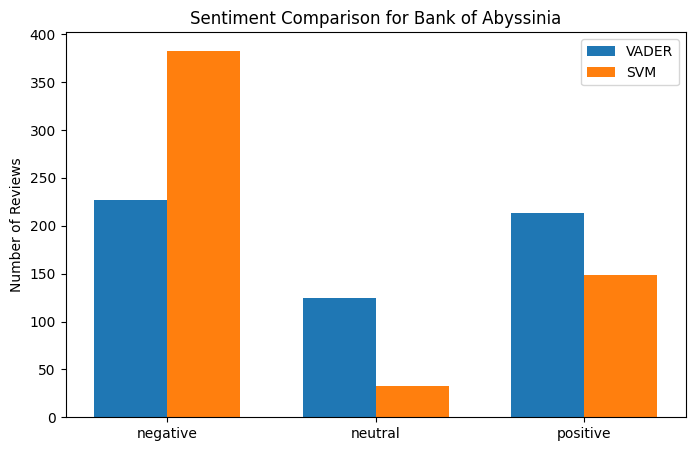

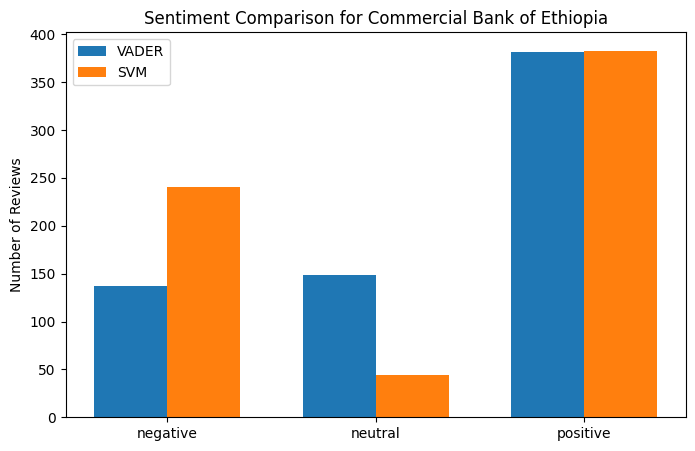

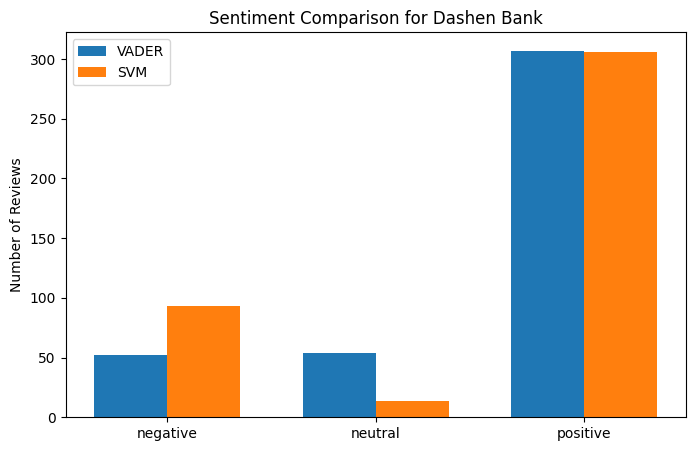

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# ------------------------------
# 1️⃣ Project paths
# ------------------------------
# Assuming this notebook is in notebooks/
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
processed_path = os.path.join(project_root, "data", "processed")

# File names as saved in your individual notebooks
vader_csv = os.path.join(processed_path, "reviews_with_vader.csv")
svm_csv   = os.path.join(processed_path, "reviews_with_svm.csv")

# ------------------------------
# 2️⃣ Load CSVs
# ------------------------------
df_vader = pd.read_csv(vader_csv)
df_svm   = pd.read_csv(svm_csv)

print("VADER sample:")
print(df_vader[['bank_name','sentiment_label_vader']].head())

print("\nSVM sample:")
print(df_svm[['bank_name','sentiment_label_svm']].head())

# ------------------------------
# 3️⃣ Aggregate sentiment counts by bank
# ------------------------------
def aggregate_sentiment_counts(df, sentiment_col):
    return df.groupby(['bank_name', sentiment_col]).size().unstack(fill_value=0).reset_index()

vader_counts = aggregate_sentiment_counts(df_vader, 'sentiment_label_vader')
svm_counts   = aggregate_sentiment_counts(df_svm, 'sentiment_label_svm')

# ------------------------------
# 4️⃣ Merge for side-by-side comparison
# ------------------------------
comparison_df = vader_counts.merge(
    svm_counts,
    on='bank_name',
    suffixes=('_vader','_svm')
)

print("\nSide-by-side comparison table:")
print(comparison_df)

# ------------------------------
# 5️⃣ Plot comparison
# ------------------------------
sentiments = ['negative','neutral','positive']

for bank in comparison_df['bank_name']:
    vader_vals = comparison_df.loc[comparison_df['bank_name']==bank, [s+'_vader' for s in sentiments]].values.flatten()
    svm_vals   = comparison_df.loc[comparison_df['bank_name']==bank, [s+'_svm' for s in sentiments]].values.flatten()
    
    x = range(len(sentiments))
    width = 0.35
    
    plt.figure(figsize=(8,5))
    plt.bar([i - width/2 for i in x], vader_vals, width=width, label='VADER')
    plt.bar([i + width/2 for i in x], svm_vals, width=width, label='SVM')
    
    plt.xticks(x, sentiments)
    plt.ylabel('Number of Reviews')
    plt.title(f'Sentiment Comparison for {bank}')
    plt.legend()
    plt.show()
